In [1]:
import xarray as xr 
import numpy as np
import matplotlib.pyplot as plt 
import datetime as dt 

### JASMIN Servers

In [2]:
# import sys
# sys.path.append('/home/users/cturrell/documents/eddy_feedback/')
# import functions.data_wrangling as data 
# import functions.eddy_feedback as ef 

# srip = xr.open_mfdataset('/badc/srip/data/zonal/common_grid/jra_55/TEM_monthly*')
# ds = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/reanalysis_data/jra55_daily/jra55_uvtw.nc',
#                        parallel=True, chunks={'time':31})

### MATHS Servers

In [3]:
import sys
sys.path.append('/home/links/ct715/eddy_feedback/')
import functions.data_wrangling as data 
import functions.eddy_feedback as ef 

srip = xr.open_mfdataset('/home/links/ct715/data_storage/reanalysis/srip_datasets/jra55_TEM_monthly_orig.nc')
srip

<xarray.Dataset>
Dimensions:         (time: 708, pressure: 22, latitude: 73)
Coordinates:
  * time            (time) datetime64[ns] 1958-01-14T09:00:00 ... 2016-12-14T...
  * pressure        (pressure) float32 1e+03 925.0 850.0 700.0 ... 3.0 2.0 1.0
  * latitude        (latitude) float32 -90.0 -87.5 -85.0 ... 85.0 87.5 90.0
Data variables: (12/37)
    EPF_p_qg        (time, pressure, latitude) float32 dask.array<chunksize=(708, 22, 73), meta=np.ndarray>
    EPF_phi_qg      (time, pressure, latitude) float32 dask.array<chunksize=(708, 22, 73), meta=np.ndarray>
    EPFD_p_qg       (time, pressure, latitude) float32 dask.array<chunksize=(708, 22, 73), meta=np.ndarray>
    EPFD_phi_qg     (time, pressure, latitude) float32 dask.array<chunksize=(708, 22, 73), meta=np.ndarray>
    EPF_p_pr        (time, pressure, latitude) float32 dask.array<chunksize=(708, 22, 73), meta=np.ndarray>
    EPF_phi_pr      (time, pressure, latitude) float32 dask.array<chunksize=(708, 22, 73), meta=np.ndarray>
    ...              ...
    EPFD_p_qg_k3    (time, pressure, latitude) float32 dask.array<chunksize=(708, 22, 73), meta=np.ndarray>
    EPFD_phi_qg_k3  (time, pressure, latitude) float32 dask.array<chunksize=(708, 22, 73), meta=np.ndarray>
    EPF_p_pr_k3     (time, pressure, latitude) float32 dask.array<chunksize=(708, 22, 73), meta=np.ndarray>
    EPF_phi_pr_k3   (time, pressure, latitude) float32 dask.array<chunksize=(708, 22, 73), meta=np.ndarray>
    EPFD_p_pr_k3    (time, pressure, latitude) float32 dask.array<chunksize=(708, 22, 73), meta=np.ndarray>
    EPFD_phi_pr_k3  (time, pressure, latitude) float32 dask.array<chunksize=(708, 22, 73), meta=np.ndarray>
Attributes:
    Title:                     Transformed Eulerian Mean (TEM) diagnostics / ...
    Description:               EP flux and other terms from the TEM equations...
    Reanalysis:                jra_55
    Project_Homepage:          http://s-rip.ees.hokudai.ac.jp/
    SPARC_Homepage:            http://www.sparc-climate.org/
    Author:                    Patrick Martineau
    Report_issues_with_data:   patrick.martineau2@mail.mcgill.ca
    Creation_Date:             15-Oct-2017 09:41:14
    history:                   Sun Oct 15 09:41:14 2017: ncra /data/A/SRIP_da...
    nco_openmp_thread_number:  1

In [4]:
ds = xr.open_mfdataset('/home/links/ct715/data_storage/reanalysis/jra55_daily/jra55_uvtw.nc',
                       parallel=True, chunks={'time':31})
ds = ef.calculate_epfluxes_ubar(ds)
ds 

<xarray.Dataset>
Dimensions:  (time: 21550, level: 37, lat: 73, lon: 144)
Coordinates:
  * time     (time) datetime64[ns] 1958-01-01T09:00:00 ... 2016-12-31T09:00:00
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float64 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * level    (level) float64 1.0 2.0 3.0 5.0 7.0 ... 925.0 950.0 975.0 1e+03
Data variables:
    u        (time, level, lat, lon) float32 dask.array<chunksize=(31, 37, 73, 144), meta=np.ndarray>
    v        (time, level, lat, lon) float32 dask.array<chunksize=(31, 37, 73, 144), meta=np.ndarray>
    t        (time, level, lat, lon) float32 dask.array<chunksize=(31, 37, 73, 144), meta=np.ndarray>
    omega    (time, level, lat, lon) float32 dask.array<chunksize=(31, 37, 73, 144), meta=np.ndarray>
    ubar     (time, level, lat) float32 dask.array<chunksize=(31, 37, 73), meta=np.ndarray>
    ep1      (time, level, lat) float64 0.005775 -9.279 ... 2.268 0.0006846
    ep2      (time, level, lat) float64 -4.366e-12 -0.0002097 ... -0.01421 -0.0
    div1     (time, level, lat) float64 -2.556e+12 8.195 ... 0.5563 3.03e+11
    div2     (time, level, lat) float64 5.635e-07 4.18 ... -1.299 9.565e-07

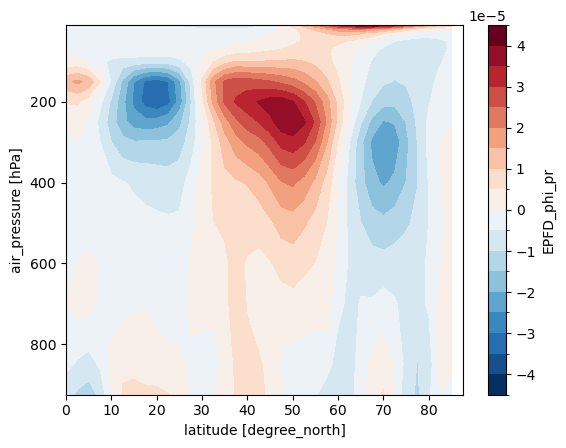

In [5]:
srip1 = srip.EPFD_phi_pr.groupby('time.month').mean('time')

srip1 = srip1.sel(latitude=slice(0., 87.5))
srip1 = srip1.sel(pressure=slice(925.,10.))

srip1.mean('month').plot.contourf(yincrease=False, yscale='linear', levels=20)

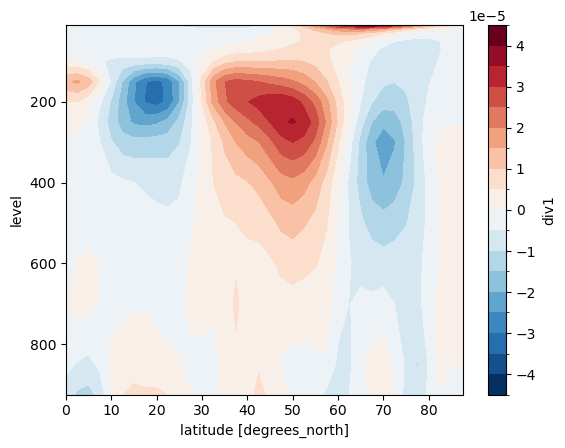

In [6]:
div1 = ds.div1.groupby('time.month').mean('time')
div1 = div1.sel(level = srip.pressure.values)
div1 = div1 / 86400

div1 = div1.sel(lat=slice(87.5,0.))
div1 = div1.sel(level=slice(925.,10.))

div1.mean('month').plot.contourf(yincrease=False, yscale='linear', levels=20)

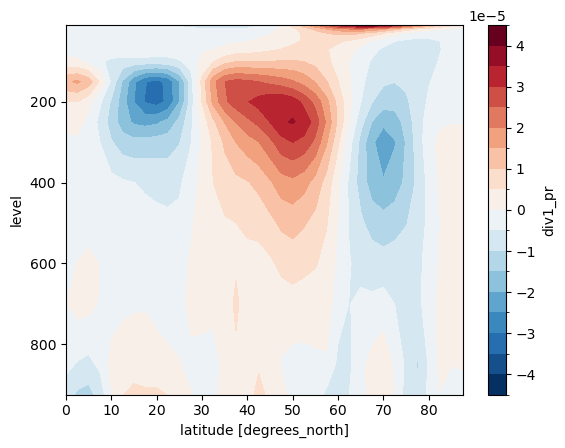

In [7]:
jra = xr.open_mfdataset('/home/links/ct715/data_storage/reanalysis/jra55_daily/jra55_ubar_ep-both.nc',
                            parallel=True, chunks={'time': 31})
jra


div1pr = jra.div1_pr / 86400
div1pr = div1pr.groupby('time.month').mean('time')

div1pr = div1pr.sel(lat=srip1.latitude.values)
div1pr = div1pr.sel(level=srip1.pressure.values)

div1pr.mean('month').plot.contourf(yincrease=False, yscale='linear', levels=20)

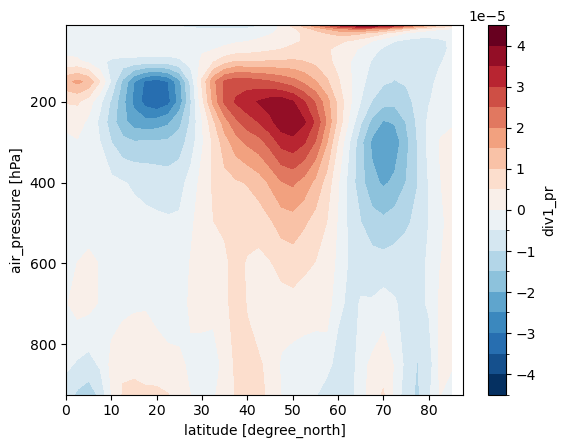

In [8]:
srip_old = xr.open_mfdataset('/home/links/ct715/data_storage/reanalysis/srip_datasets/jra55_TEM_ubar_div1.nc',
                            parallel=True, chunks={'time': 31})

srip1old = srip_old.div1_pr.groupby('time.month').mean('time')

srip1old = srip1old.sel(latitude=slice(0., 87.5))
srip1old = srip1old.sel(pressure=slice(925.,10.))

srip1old.mean('month').plot.contourf(yincrease=False, yscale='linear', levels=20)

# Eddy Feedback Parameter

In [26]:
ds 

<xarray.Dataset>
Dimensions:  (time: 21550, level: 37, lat: 73, lon: 144)
Coordinates:
  * time     (time) datetime64[ns] 1958-01-01T09:00:00 ... 2016-12-31T09:00:00
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float64 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * level    (level) float64 1.0 2.0 3.0 5.0 7.0 ... 925.0 950.0 975.0 1e+03
Data variables:
    u        (time, level, lat, lon) float32 dask.array<chunksize=(31, 37, 73, 144), meta=np.ndarray>
    v        (time, level, lat, lon) float32 dask.array<chunksize=(31, 37, 73, 144), meta=np.ndarray>
    t        (time, level, lat, lon) float32 dask.array<chunksize=(31, 37, 73, 144), meta=np.ndarray>
    omega    (time, level, lat, lon) float32 dask.array<chunksize=(31, 37, 73, 144), meta=np.ndarray>
    ubar     (time, level, lat) float32 dask.array<chunksize=(31, 37, 73), meta=np.ndarray>
    ep1      (time, level, lat) float64 0.005775 -9.279 ... 2.268 0.0006846
    ep2      (time, level, lat) float64 -4.366e-12 -0.0002097 ... -0.01421 -0.0
    div1     (time, level, lat) float64 -2.556e+12 8.195 ... 0.5563 3.03e+11
    div2     (time, level, lat) float64 5.635e-07 4.18 ... -1.299 9.565e-07

In [29]:
efp_ds = ef.calculate_efp(ds, which_div1='div1', flip_latitude=True)
efp_ds

Seasonal data has been calculated for 1979-2015.



<xarray.DataArray ()>
array(0.40054399)

In [30]:
efp_jra = ef.calculate_efp(jra, flip_latitude=True)
efp_jra

Seasonal data has been calculated for 1979-2015.



<xarray.DataArray ()>
array(0.40054399)

In [36]:
efp_srip = ef.calculate_efp(srip_old, check_variables=True, flip_level=True)
efp_srip 

Seasonal data has been calculated for 1979-2015.



<xarray.DataArray ()>
array(0.46551589)

In [37]:
jra1 = jra.resample(time='MS').mean('time')
jra1 

<xarray.Dataset>
Dimensions:  (time: 708, level: 37, lat: 73)
Coordinates:
  * lat      (lat) float64 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * level    (level) float64 1.0 2.0 3.0 5.0 7.0 ... 925.0 950.0 975.0 1e+03
  * time     (time) datetime64[ns] 1958-01-01 1958-02-01 ... 2016-12-01
Data variables:
    ubar     (time, level, lat) float32 dask.array<chunksize=(1, 37, 73), meta=np.ndarray>
    div1_pr  (time, level, lat) float64 dask.array<chunksize=(1, 37, 73), meta=np.ndarray>
    div1_qg  (time, level, lat) float64 dask.array<chunksize=(1, 37, 73), meta=np.ndarray>

In [38]:
efp_jra1 = ef.calculate_efp(jra, flip_latitude=True)
efp_jra1

Seasonal data has been calculated for 1979-2015.



<xarray.DataArray ()>
array(0.40054399)